## Data description


Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## import data in google colab

https://www.analyticsvidhya.com/blog/2021/06/how-to-load-kaggle-datasets-directly-into-google-colab/

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! unzip titanic

Archive:  titanic.zip
replace gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## read data

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


### few plot to describe data

In [ ]:
import matplotlib.pyplot as plt

(array([549.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 342.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

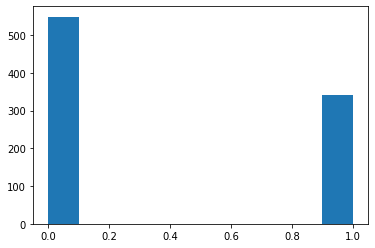

In [ ]:
plt.hist(train.Survived)

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

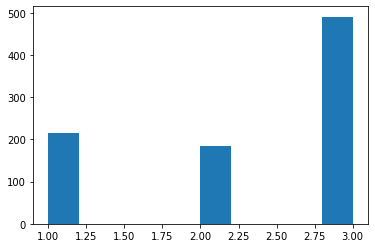

In [ ]:
plt.hist(train["Pclass"])

(array([0.04489338, 0.01571268, 0.01683502, 0.03479237, 0.08866442,
        0.10998878, 0.09539843, 0.09427609, 0.08193042, 0.05050505,
        0.03928171, 0.03928171, 0.0325477 , 0.01795735, 0.01459035,
        0.01234568, 0.00448934, 0.00561167, 0.00112233, 0.00112233]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

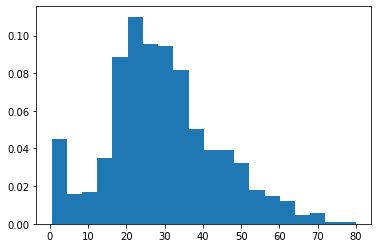

In [ ]:
B=np.array(train.Age)  # 1*50
A=np.ones_like(B)     # 1*50
plt.hist(B,weights=A/A.sum(),bins=20)

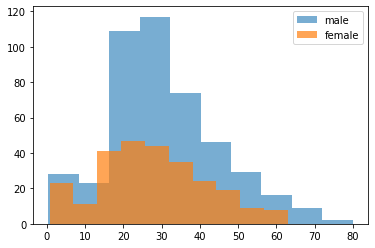

In [ ]:
train_1=train[train.Sex=="male"]
train_2=train[train.Sex!="male"]
plt.hist(train_1.Age,alpha=0.6,label="male")
plt.hist(train_2.Age,alpha=0.7,label="female")
plt.legend()

(array([608., 209.,  28.,  16.,   0.,  18.,   5.,   0.,   0.,   7.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

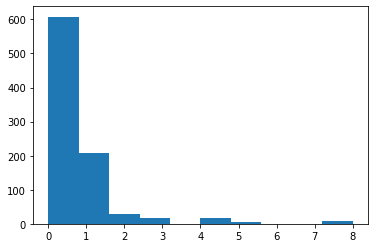

In [ ]:
plt.hist(train.SibSp)

### Data processing

In [ ]:
train.drop(["PassengerId"],axis=1,inplace=True)

In [ ]:
# train=train.drop(["PassengerId"],axis=1)

In [ ]:
train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(["Survived"],axis=1), train["Survived"], test_size=0.2, random_state=12345)

In [ ]:
X_train

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
221,2,"Bracken, Mr. James H",male,27.0,0,0,220367,13.0000,NaN,S
824,3,"Panula, Master. Urho Abraham",male,2.0,4,1,3101295,39.6875,NaN,S
672,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
188,3,"Bourke, Mr. John",male,40.0,1,1,364849,15.5000,NaN,Q
311,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
...,...,...,...,...,...,...,...,...,...,...
420,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,349254,7.8958,NaN,C
129,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
285,3,"Stankovic, Mr. Ivan",male,33.0,0,0,349239,8.6625,NaN,C
485,3,"Lefebre, Miss. Jeannie",female,NaN,3,1,4133,25.4667,NaN,S


### data preprocessing

In [ ]:
X_train.isna().sum()

Pclass        0
Name          0
Sex           0
Age         144
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       546
Embarked      2
dtype: int64

In [ ]:
X_train.shape[0]

712

In [ ]:
X_test.isna().sum()

Pclass        0
Name          0
Sex           0
Age          33
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       141
Embarked      0
dtype: int64

In [ ]:
X_test.shape[0]

179

In [ ]:
X_train["Sex"]=pd.get_dummies(X_train["Sex"])["male"] #1 male 0 female
X_test["Sex"]=pd.get_dummies(X_test["Sex"])["male"]

In [ ]:
X_train["Pclass_1"]=pd.get_dummies(X_train["Pclass"])[1]
X_train["Pclass_2"]=pd.get_dummies(X_train["Pclass"])[2]

X_test["Pclass_1"]=pd.get_dummies(X_test["Pclass"])[1]
X_test["Pclass_2"]=pd.get_dummies(X_test["Pclass"])[2]

In [ ]:
X_train.join(pd.get_dummies(X_train["Pclass"],drop_first=True))

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,2,3
221,2,"Bracken, Mr. James H",1,27.0,0,0,220367,13.0000,NaN,S,0,1,1,0
824,3,"Panula, Master. Urho Abraham",1,2.0,4,1,3101295,39.6875,NaN,S,0,0,0,1
672,2,"Mitchell, Mr. Henry Michael",1,70.0,0,0,C.A. 24580,10.5000,NaN,S,0,1,1,0
188,3,"Bourke, Mr. John",1,40.0,1,1,364849,15.5000,NaN,Q,0,0,0,1
311,1,"Ryerson, Miss. Emily Borie",0,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,3,"Gheorgheff, Mr. Stanio",1,NaN,0,0,349254,7.8958,NaN,C,0,0,0,1
129,3,"Ekstrom, Mr. Johan",1,45.0,0,0,347061,6.9750,NaN,S,0,0,0,1
285,3,"Stankovic, Mr. Ivan",1,33.0,0,0,349239,8.6625,NaN,C,0,0,0,1
485,3,"Lefebre, Miss. Jeannie",0,NaN,3,1,4133,25.4667,NaN,S,0,0,0,1


In [ ]:
X_train.drop(["Pclass"],axis=1,inplace=True)

In [ ]:
X_train

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2
221,"Bracken, Mr. James H",1,27.0,0,0,220367,13.0000,NaN,S,0,1
824,"Panula, Master. Urho Abraham",1,2.0,4,1,3101295,39.6875,NaN,S,0,0
672,"Mitchell, Mr. Henry Michael",1,70.0,0,0,C.A. 24580,10.5000,NaN,S,0,1
188,"Bourke, Mr. John",1,40.0,1,1,364849,15.5000,NaN,Q,0,0
311,"Ryerson, Miss. Emily Borie",0,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1,0
...,...,...,...,...,...,...,...,...,...,...,...
420,"Gheorgheff, Mr. Stanio",1,NaN,0,0,349254,7.8958,NaN,C,0,0
129,"Ekstrom, Mr. Johan",1,45.0,0,0,347061,6.9750,NaN,S,0,0
285,"Stankovic, Mr. Ivan",1,33.0,0,0,349239,8.6625,NaN,C,0,0
485,"Lefebre, Miss. Jeannie",0,NaN,3,1,4133,25.4667,NaN,S,0,0


### one solution to fill null data

In [ ]:
np.array(X_train.Age.dropna()).max()

80.0

In [ ]:
np.array(X_train.Age.dropna()).min()

0.42

In [ ]:
np.array(X_train.Age.dropna()).mean()

29.271566901408452

In [ ]:
X_train.Age.dropna().median()

28.0

### string columns  process

In [ ]:
X_train["family_name"]=X_train["Name"].apply(lambda x : x.split()[0][:-1])

In [ ]:
Age_data=pd.DataFrame(X_train[X_train.Age.isna()!=True].groupby(["family_name","SibSp"]).agg({'Age': ['mean', 'count']})).reset_index()

In [ ]:
Age_data

family_name SibSp   Age      
                       mean count
0        Abbing     0  42.0     1
1        Abbott     1  25.5     2
2       Abelson     1  29.0     2
3         Adahl     0  30.0     1
4         Adams     0  26.0     1
..          ...   ...   ...   ...
466     Yasbeck     1  15.0     1
467       Young     0  36.0     1
468   Zimmerman     0  29.0     1
469           d     0  23.0     2
470           d     1  36.0     1

[471 rows x 4 columns]

In [ ]:
Age_data.columns

MultiIndex([('family_name',      ''),
            (      'SibSp',      ''),
            (        'Age',  'mean'),
            (        'Age', 'count')],
           )

In [ ]:
Age_data=Age_data.rename(columns={"family_name', '":"family_name","SibSp', '":"SibSp","Age', 'mean":"mean","Age', 'count":"count"})

In [ ]:
train_0=X_train[X_train.Age.isna()==True]

def func(x):
  if(Age_data[(==Ax["family_name"]ge_data["family_name"]) & (Age_data["SibSp"]==x["SibSp"])].size >0):
    print("we made it")
    x["Age"]=Age_data[(x["family_name"]==Age_data["family_name"]) & (Age_data["SibSp"]==x["SibSp"])]['Age',  'mean']
  else:
    x["Age"]= -1


train_0[["family_name","SibSp"]].apply(lambda x: func(x),axis=1)

we made it
we made it
we made it
we made it
we made it
we made it
we made it
we made it


384    None
270    None
878    None
507    None
602    None
       ... 
650    None
77     None
425    None
420    None
485    None
Length: 144, dtype: object

In [ ]:
train_0[train_0["Age"].isna()!=True]

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,family_name


In [ ]:
X_train[X_train["Age"].isna()!=True]

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,family_name
221,"Bracken, Mr. James H",1,27.0,0,0,220367,13.0000,NaN,S,0,1,Bracken
824,"Panula, Master. Urho Abraham",1,2.0,4,1,3101295,39.6875,NaN,S,0,0,Panula
672,"Mitchell, Mr. Henry Michael",1,70.0,0,0,C.A. 24580,10.5000,NaN,S,0,1,Mitchell
188,"Bourke, Mr. John",1,40.0,1,1,364849,15.5000,NaN,Q,0,0,Bourke
311,"Ryerson, Miss. Emily Borie",0,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1,0,Ryerson
...,...,...,...,...,...,...,...,...,...,...,...,...
357,"Funk, Miss. Annie Clemmer",0,38.0,0,0,237671,13.0000,NaN,S,0,1,Funk
382,"Tikkanen, Mr. Juho",1,32.0,0,0,STON/O 2. 3101293,7.9250,NaN,S,0,0,Tikkanen
129,"Ekstrom, Mr. Johan",1,45.0,0,0,347061,6.9750,NaN,S,0,0,Ekstrom
285,"Stankovic, Mr. Ivan",1,33.0,0,0,349239,8.6625,NaN,C,0,0,Stankovic


In [ ]:
Age_data[("Plotcharsky"==Age_data["family_name"]) & (Age_data["SibSp"]==0)]

Empty DataFrame
Columns: [(family_name, ), (SibSp, ), (Age, mean), (Age, count)]
Index: []

In [ ]:
X_train.Age.fillna(29,inplace=True)

In [ ]:
X_test.Age.fillna(29,inplace=True)

In [ ]:
X_train.isna().sum()

Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          546
Embarked         2
Pclass_1         0
Pclass_2         0
family_name      0
dtype: int64

(array([ 47.,  38., 142., 275.,  94.,  58.,  35.,  17.,   5.,   1.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 10 Patch objects>)

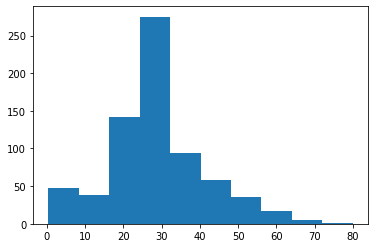

In [ ]:
plt.hist(X_train["Age"])

In [ ]:
X_test

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,power_0,power_1,power_2
688,3,"Fischer, Mr. Eberhard Thelander",1,18.0,0,0,350036,7.7958,NaN,S,0,0,0,0,0
785,3,"Harmer, Mr. Abraham (David Lishin)",1,25.0,0,0,374887,7.2500,NaN,S,0,0,0,0,0
445,1,"Dodge, Master. Washington",1,4.0,0,2,33638,81.8583,A34,S,1,0,1,0,0
529,2,"Hocking, Mr. Richard George",1,23.0,2,1,29104,11.5000,NaN,S,0,1,0,0,0
241,3,"Murphy, Miss. Katherine ""Kate""",0,29.0,1,0,367230,15.5000,NaN,Q,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,1,"Fortune, Mr. Charles Alexander",1,19.0,3,2,19950,263.0000,C23 C25 C27,S,1,0,0,0,0
679,1,"Cardeza, Mr. Thomas Drake Martinez",1,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,1,0,0,0,0
548,3,"Goldsmith, Mr. Frank John",1,33.0,1,1,363291,20.5250,NaN,S,0,0,0,0,0
875,3,"Najib, Miss. Adele Kiamie ""Jane""",0,15.0,0,0,2667,7.2250,NaN,C,0,0,0,0,0


In [ ]:
X_train["power_0"]=0
X_train["power_1"]=0
X_train["power_2"]=0
# X_train["power_3"]=0

X_train.loc[X_train["Age"]<=4,'power_0']=1
X_train.loc[(X_train["Age"]<=12)& (X_train["Age"]>4),"power_1"]=1
X_train.loc[(X_train["Age"]<=40)& (X_train["Age"]>12),"power_2"]=1
# X_train.loc[X_train["Age"]>40,"power_3"]=1

In [ ]:
X_test["power_0"]=0
X_test["power_1"]=0
X_test["power_2"]=0
# X_train["power_3"]=0

X_test.loc[X_test["Age"]<=4,'power_0']=1
X_test.loc[(X_test["Age"]<=12)& (X_test["Age"]>4),"power_1"]=1
X_test.loc[(X_test["Age"]<=40)& (X_test["Age"]>12),"power_2"]=1

In [ ]:
X_train

,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_1,Pclass_2,family_name,power_0,power_1,power_2
221,"Bracken, Mr. James H",1,27.0,0,0,220367,13.0000,NaN,S,0,1,Bracken,0,0,1
824,"Panula, Master. Urho Abraham",1,2.0,4,1,3101295,39.6875,NaN,S,0,0,Panula,1,0,0
672,"Mitchell, Mr. Henry Michael",1,70.0,0,0,C.A. 24580,10.5000,NaN,S,0,1,Mitchell,0,0,0
188,"Bourke, Mr. John",1,40.0,1,1,364849,15.5000,NaN,Q,0,0,Bourke,0,0,1
311,"Ryerson, Miss. Emily Borie",0,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,1,0,Ryerson,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,"Gheorgheff, Mr. Stanio",1,29.0,0,0,349254,7.8958,NaN,C,0,0,Gheorgheff,0,0,1
129,"Ekstrom, Mr. Johan",1,45.0,0,0,347061,6.9750,NaN,S,0,0,Ekstrom,0,0,0
285,"Stankovic, Mr. Ivan",1,33.0,0,0,349239,8.6625,NaN,C,0,0,Stankovic,0,0,1
485,"Lefebre, Miss. Jeannie",0,29.0,3,1,4133,25.4667,NaN,S,0,0,Lefebre,0,0,1


In [ ]:
X_train.drop(["Name","Age","Ticket","Fare","Cabin","Embarked","family_name"],axis=1,inplace=True)

In [ ]:
X_test.drop(["Name","Age","Ticket","Fare","Cabin","Embarked"],axis=1,inplace=True)

### Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
X_train

,Sex,SibSp,Parch,Pclass_1,Pclass_2,power_0,power_1,power_2
221,1,0,0,0,1,0,0,1
824,1,4,1,0,0,1,0,0
672,1,0,0,0,1,0,0,0
188,1,1,1,0,0,0,0,1
311,0,2,2,1,0,0,0,1
...,...,...,...,...,...,...,...,...
420,1,0,0,0,0,0,0,1
129,1,0,0,0,0,0,0,0
285,1,0,0,0,0,0,0,1
485,0,3,1,0,0,0,0,1


In [ ]:
reg = LinearRegression()

In [ ]:
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:

reg.score(X_train,y_train)

0.4160237756227675

In [ ]:
reg.coef_

array([-0.50755585, -0.04587154, -0.02982009,  0.36573769,  0.20146374,
        0.55183119,  0.32771571,  0.14035137])

In [ ]:
reg.intercept_

0.4678477728534196

In [ ]:
X_test.drop(["Pclass"],axis=1,inplace=True)

In [ ]:
X_test

,Pclass,Sex,SibSp,Parch,Pclass_1,Pclass_2,power_0,power_1,power_2
688,3,1,0,0,0,0,0,0,1
785,3,1,0,0,0,0,0,0,1
445,1,1,0,2,1,0,1,0,0
529,2,1,2,1,0,1,0,0,1
241,3,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
27,1,1,3,2,1,0,0,0,1
679,1,1,0,1,1,0,0,0,1
548,3,1,1,1,0,0,0,0,1
875,3,0,0,0,0,0,0,0,1


In [ ]:
reg.score(X_test,y_test)

0.35610121684891594

In [ ]:
X_train_1=X_train.copy()

In [ ]:
X_train_1["SibSp"]=X_train_1["SibSp"]+ X_train_1["Parch"]

In [ ]:
X_train_1.drop(["Parch"],axis=1,inplace=True)

In [ ]:
reg.fit(X_train_1,y_train)

LinearRegression()

In [ ]:
reg.score(X_train_1,y_train)

0.41572099851236655

In [ ]:
reg.coef_

array([-0.51052398, -0.03990171,  0.36528701,  0.20239806,  0.55296608,
        0.32713846,  0.1385719 ])

In [ ]:
from sklearn import linear_model  

In [ ]:
reg = linear_model.Ridge(alpha=2)

In [ ]:
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.41539430122093934

https://scikit-learn.org/stable/modules/linear_model.html

### home work:

do the rest